# Momentum and AdaGrad 
Presented during ML reading group, 2019-10-29.

Author: Lucian Sasu, lmsasu@unitbv.ro

In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


print(f'Numpy version: {np.__version__}')

Numpy version: 1.16.5


# Momentum method

## Momentum description

The momentum method usually accelerates the training process. The momentum method says that the modification of current weights is based not only the gradient, but also on the previous modification:
$$
\Delta \mathbf{w}_{t+1} = \gamma \Delta \mathbf{w}_{t} - \eta \nabla_{\mathbf{w}}J(\mathbf{w}_{t})
$$
and thus the modification of weights becomes:
$$
\mathbf{w}_{t+1} = \mathbf{w}_{t} + \Delta \mathbf{w}_{t+1} = \mathbf{w}_{t} + \gamma \Delta \mathbf{w}_{t} - \eta \nabla_{\mathbf{w}}J(\mathbf{w}_{t})
$$

Thus, the search is influenced by the previous direction. It tends to preserve the direction of search and prevents oscillations. In most libraries, $\gamma$ defaults to 0.9. 

## Generate data

Let us generate input 2d data, $(x, y) \in [-scale1, scale1] \times [-scale2, scale2]$, independently and uniformly distributed. The ground truth values associated with a pair $(x, y)$ is $y=a \cdot x + b \cdot y$ (note lack of intercept), to which we add random noise from $\mathcal{N}(0, 1)$.  

In [1]:
np.random.seed(10) # for reproducibility
n_data = 100
scale1, scale2 = 1, 1 # play with these... 

a, b = 3, 7

def gen_data(n, scale1, scale2, a, b, add_noise=True):
    # produce: X, a 2d tensor with n lines and 2 columns
    # and X[:, 0] uniformly distributed in [-scale1, scale1], X[:, 1] in [-scale2, scale2]
    # let y be a*X[:, 0] + b*X[:, 1] + epsilon, with epsilon ~ N(0, 1); y is a column vector with n elements
    return X, y

In [3]:
X, y = gen_data(n_data, scale1, scale2, a, b)

3d plot $(X, y)$

c:\Anaconda3\envs\mlreading\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


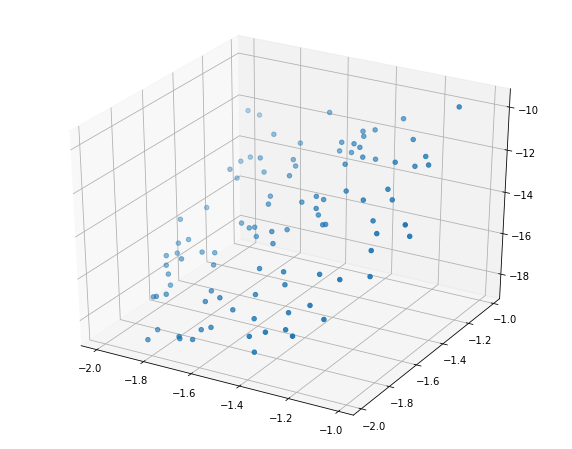

In [4]:
fig = plt.figure(figsize=(10, 8))
# fig, axes = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, marker='o')
fig.show()

## Define error function, gradient, inference

In [5]:
def model_estimate(X, w):
    '''Computes the linear regression estimation on the dataset X, using coefficients w
    :param X: a 2d tensor with n lines and 2 columns
    :param w: a 1d tensor with 2 coefficients (no intercept)
    :return: a 1d tensor witn n lines, y_hat = X[:, 0] * w[0] + X[:, 1] * w[1]
    '''
    # vectorized implementation of the linear regression

In [6]:
def J(X, y, w):
    """Computes the mean squared error of model. See the picture below for implementation.
    :param X: input values, of shape n x 2
    :param y: ground truth, column vector with n values
    :param w: column with 2 coeffieicnts for the linear form 
    :return: a scalar value >= 0
    """
    # vectorized code

In [7]:
J(X, y, w=np.array([3, 7]))

17.718893616695997

In [8]:
# TODO: contour plots of error function

## Vanilla gradient descent

[Cheatsheet](https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181)

![Cheatsheet](https://miro.medium.com/max/1408/1*PZ3TTZZIT1wlqyt05TpZBg.png)

In [9]:
def gradient(X, y, w):
    '''Commputes the gradients to be used for gradient descent. 
    :param X: 2d tensor with training data
    :param y: 1d tensor with y.shape[0] == W.shape[0]
    :param w: 1d tensor with current values of the coefficients
    :return: gradients to be used for dradgradient descent. See picture above
    '''
    n = len(y)
    w = w.reshape(-1, 1)
    return ## implement

In [10]:
gradient(X, y, w=np.array([3, 7]))

array([[0.79219656],
       [0.77392298]])

In [11]:
def gd_no_momentum(X, y, w_init, eta=1e-1):
    '''Iterates with gradient descent. algorithm
    :param X: 2d tensor with data
    :param y: 1d tensor, ground truth 
    :param w_init: 1d tensor with the 2 initil coefficients
    :param eta: the learning rate hyperparameter
    :return: the list of succesive errors and the found w* vector 
    '''

In [12]:
w_init = np.array([0, 0])
errors, w_best = gd_no_momentum(X, y, w_init)

In [13]:
print(f'How many iterations were made: {len(errors)}')

How many iterations were made: 421


In [14]:
w_best

array([[2.92909156],
       [6.73873651]])

Text(0.5, 1.0, 'Optimization without momentum')

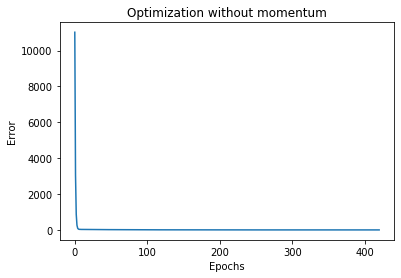

In [15]:
fig, axes = plt.subplots()
axes.plot(list(range(len(errors))), errors)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization without momentum')

In [16]:
# TODO: show evolution of w on a 2d countour plot 

## Momentum algorithm

In [17]:
def gd_with_momentum(X, y, w_init, eta=1e-1, gamma = 0.9):
    """Applies grdient descent with momentum coefficient
    :params: as in gd_no_momentum
    :param gamma: momentum coefficient
    :return: the list of succesive errors and the found w* vector 
    """

In [18]:
w_init = np.array([0, 0])
errors_momentum, w_best = gd_with_momentum(X, y, w_init)

In [19]:
print(f'How many iterations were made: {len(errors_momentum)}')

How many iterations were made: 104


In [20]:
w_best

array([[2.82984759],
       [6.81079277]])

Text(0.5, 1.0, 'Optimization with momentum')

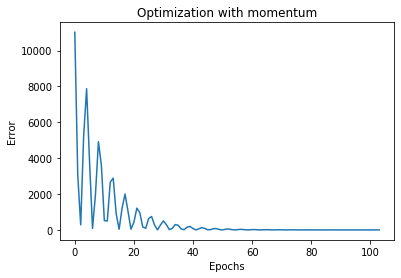

In [21]:
fig, axes = plt.subplots()
axes.plot(list(range(len(errors_momentum))), errors_momentum)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')
axes.set_title('Optimization with momentum')

In [22]:
# Note: if one plays with scale1, scale2 from above - e.g. scale1=10, scale2=1 - then the results are very interesting....

In [23]:
# TODO: show evolution of w on a 2d countour plot 

# AdaGrad

The [AdaGrad paper](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf) comes with the idea of using different learning rates for each feature. Hence, instead of:
$$
\begin{bmatrix}
w_{t+1}^{(1)} \\
w_{t+1}^{(2)} \\
\dots \\
w_{t+1}^{(n)} \\
\end{bmatrix} = 
\begin{bmatrix}
w_{t}^{(1)} \\
w_{t}^{(2)} \\
\dots \\
w_{t}^{(n)} \\
\end{bmatrix}
- \eta \cdot
\begin{bmatrix}
g_{t}^{(1)} \\
g_{t}^{(2)} \\
\dots \\
g_{t}^{(n)} \\
\end{bmatrix}
=
\begin{bmatrix}
w_{t}^{(1)} \\
w_{t}^{(2)} \\
\dots \\
w_{t}^{(n)} \\
\end{bmatrix}
- 
\begin{bmatrix}
\eta \\
\eta \\
\dots \\
\eta \\
\end{bmatrix}
\odot
\begin{bmatrix}
g_{t}^{(1)} \\
g_{t}^{(2)} \\
\dots \\
g_{t}^{(n)} \\
\end{bmatrix}
$$

AdaGrad comes with:
$$
\begin{bmatrix}
w_{t+1}^{(1)} \\
w_{t+1}^{(2)} \\
\dots \\
w_{t+1}^{(n)} \\
\end{bmatrix} = 
\begin{bmatrix}
w_{t}^{(1)} \\
w_{t}^{(2)} \\
\dots \\
w_{t}^{(n)} \\
\end{bmatrix}
- 
\begin{bmatrix}
\eta^{(1)}_{t} \\
\eta^{(2)}_{t} \\
\dots \\
\eta^{(n)}_{t} \\
\end{bmatrix}
\odot
\begin{bmatrix}
g_{t}^{(1)} \\
g_{t}^{(2)} \\
\dots \\
g_{t}^{(n)} \\
\end{bmatrix}
$$

where $g_{t}^{(j)}$ is the gradient of error function, i.e. 
$$
g_{t}^{(j)} = \frac{\partial J}{\partial w^{(j)}}\left(\begin{bmatrix}
w_{t}^{(1)} \\
w_{t}^{(2)} \\
\dots \\
w_{t}^{(n)} \\
\end{bmatrix}\right)
$$

We will use vector notations:
$$
\mathbf{w}_t = \begin{bmatrix}
w_{t}^{(1)} \\
w_{t}^{(2)} \\
\dots \\
w_{t}^{(n)} \\
\end{bmatrix}, \; 
\mathbf{g}_t = \begin{bmatrix}
g_{t}^{(1)} \\
g_{t}^{(2)} \\
\dots \\
g_{t}^{(n)} \\
\end{bmatrix} = \frac{1}{n} \sum\limits_{i=1}^n \nabla_\mathbf{w} \mathcal{L}\left(x^{(i)}, y^{(i)}, \mathbf{w}_t \right)
$$

AdaGrad specifies the update as:
$$
    \mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \left( \varepsilon I + diag(G_t) \right)^{-1/2} \cdot \mathbf{g}_t
$$
where:
* $\eta$ is the initial learning rate (hyperparameter)
* $n$ is the number of items in (mini)batch
* $G_t = \sum\limits_{\tau=1}^t \mathbf{g}_\tau \mathbf{g}_\tau^T$
* $diag(A)$ is the diagonal form of the square matrix $A$
* $\varepsilon > 0$ is used to avoid division by 0
* $I$ is the unit matrix of size $m$



In a more detailed form, the update of the weights through AdaDelta is done by:
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \left(
    \begin{bmatrix}
    \varepsilon & 0 & \dots & 0 \\
    0 & \varepsilon & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \varepsilon
    \end{bmatrix}+\begin{bmatrix}
    G_t^{(1, 1)} & 0 & \dots & 0 \\
    0 & G_t^{(2, 2)} & 0 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & G_t^{(m, m)}
    \end{bmatrix}    
\right) ^ {-1/2} \cdot \mathbf{g}_t
=
\mathbf{w}_t - 
\begin{bmatrix}
    \frac{\eta}{\sqrt{\varepsilon + G_t^{(1, 1)}}} & 0 & \dots & 0 \\
    0 & \frac{\eta}{\sqrt{\varepsilon + G_t^{(2, 2)}}} & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \frac{\eta}{\sqrt{\varepsilon + G_t^{(m, m)}}}
\end{bmatrix} \cdot \mathbf{g}_t
$$
which simplifies to:
$$
\mathbf{w}_{t+1} = \mathbf{w}_{t} - \begin{bmatrix}
    \frac{\eta}{\sqrt{\varepsilon + G_t^{(1, 1)}}} g_t^{(1)} \\
    \frac{\eta}{\sqrt{\varepsilon + G_t^{(2, 2)}}} g_t^{(2)}\\
    \dots \\
    \frac{\eta}{\sqrt{\varepsilon + G_t^{(m, m)}}} g_t^{(m)}
\end{bmatrix}
$$

## Generate data

## Define error function, gradient, inference

## Apply AdaGrad and report resulting $\eta$'s